In [114]:
from pathlib import Path

import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.ticker import MultipleLocator
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory

COLUMN_SIZE = 256
ROW_SIZE = 320
BATCH_SIZE = 32
RANDOM_STATE = 123

In [115]:
def scaling_normalization(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

In [116]:
def get_imagenes():
    path_dataset = Path('./chest_xray')
    path_train = path_dataset / 'entrenamiento'
    path_val = path_dataset / 'validacion'

    train_dataset = image_dataset_from_directory(
        path_train,
        shuffle=True,
        seed=RANDOM_STATE,
        batch_size=BATCH_SIZE,
        image_size=(ROW_SIZE, COLUMN_SIZE)
    )

    validation_dataset = image_dataset_from_directory(
        path_val,
        shuffle=True,
        seed=RANDOM_STATE,
        batch_size=BATCH_SIZE,
        image_size=(ROW_SIZE, COLUMN_SIZE)
    )

    train_dataset = train_dataset.map(scaling_normalization)
    validation_dataset = validation_dataset.map(scaling_normalization)

    return train_dataset, validation_dataset

In [117]:
def get_model():
    input_layer = layers.Input(shape=(ROW_SIZE, COLUMN_SIZE, 3))

    layer_conv_1 = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding="same",
                                 activation="relu")(input_layer)
    layer_conv_2 = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding="same",
                                 activation="relu")(layer_conv_1)

    pool_1 = layers.MaxPool2D(pool_size=(2, 2))(layer_conv_2)

    layer_conv_3 = layers.Conv2D(filters=64, kernel_size=(5, 5), strides=(2, 2), padding="same",
                                 activation="relu")(pool_1)

    pool_2 = layers.MaxPool2D(pool_size=(2, 2))(layer_conv_3)

    layer_conv_4 = layers.Conv2D(filters=128, kernel_size=(7, 7), strides=(1, 1), padding="same",
                                 activation="relu")(pool_2)
    layer_conv_5 = layers.Conv2D(filters=128, kernel_size=(7, 7), strides=(1, 1), padding="same",
                                 activation="relu")(layer_conv_4)

    global_avg = layers.GlobalAveragePooling2D()(layer_conv_5)

    dense_hidden_1 = layers.Dense(64, activation='relu')(global_avg)
    dense_hidden_2 = layers.Dense(32, activation='relu')(dense_hidden_1)

    dense_output = layers.Dense(1, activation='sigmoid')(dense_hidden_2)

    model = Model(inputs=[input_layer], outputs=[dense_output])

    model.compile(optimizer="adam", loss='binary_crossentropy')
    return model

In [118]:
dataset_train, dataset_validation = get_imagenes()

Found 500 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [119]:
model = get_model()
history = model.fit(dataset_train, validation_data=dataset_validation, epochs=10)

Epoch 1/10
16/16 [==============================] - 32s 2s/step - loss: 0.6939 - val_loss: 0.6931
Epoch 2/10
16/16 [==============================] - 31s 2s/step - loss: 0.6873 - val_loss: 0.6561
Epoch 3/10
16/16 [==============================] - 30s 2s/step - loss: 0.5846 - val_loss: 0.6187
Epoch 4/10
16/16 [==============================] - 32s 2s/step - loss: 0.5082 - val_loss: 0.5715
Epoch 5/10
16/16 [==============================] - 31s 2s/step - loss: 0.4893 - val_loss: 0.6006
Epoch 6/10
16/16 [==============================] - 32s 2s/step - loss: 0.4834 - val_loss: 0.5859
Epoch 7/10
16/16 [==============================] - 31s 2s/step - loss: 0.4251 - val_loss: 0.5621
Epoch 8/10
16/16 [==============================] - 30s 2s/step - loss: 0.4062 - val_loss: 0.5265
Epoch 9/10
16/16 [==============================] - 28s 2s/step - loss: 0.3348 - val_loss: 0.4370
Epoch 10/10
16/16 [==============================] - 27s 2s/step - loss: 0.2295 - val_loss: 0.2876


In [120]:
def plot_losses(history):
    last_epoch_loss = history.history['loss'][-1]
    last_epoch_val_loss = history.history['val_loss'][-1]

    figure = plt.figure(figsize=(10, 8))

    axes = figure.add_subplot(1, 1, 1)

    axes.plot(history.history['loss'], color="#003B80", linestyle="dotted",
              label=f"loss entrenamiento {last_epoch_loss:.2f}")
    axes.plot(history.history['val_loss'], color="#003B80", label=f"loss validación {last_epoch_val_loss:.2f}")

    axes.set_xlabel('Época', color="#003B80", fontsize=14)
    axes.set_ylabel('Pérdidas', color="#003B80", fontsize=14)

    axes.set_title('Pérdidas durante el entrenamiento', fontsize=18)
    axes.set_facecolor('#F0F7FF')
    axes.legend(loc="best")
    axes.grid(visible=True, which='major', axis='both', color="#FFFFFF", linewidth=2)
    axes.set_axisbelow(True)
    axes.set_ylim(ymin=0, ymax=1.1)
    axes.yaxis.set_major_locator(MultipleLocator(0.1))

    return figure


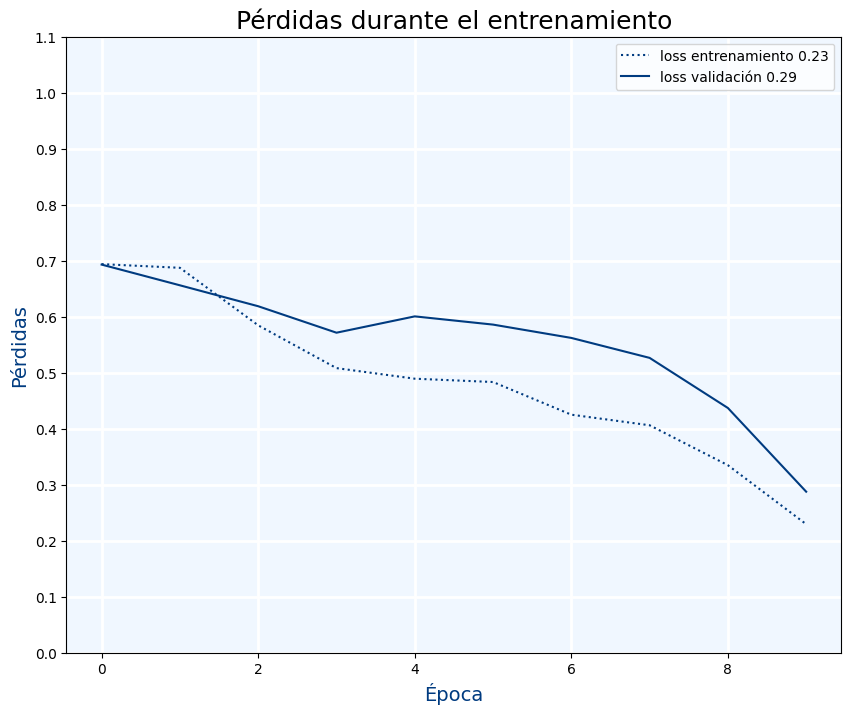

In [121]:
_ = plot_losses(history)

In [123]:
print(f"La pérdida en el entrenamiento de la ultima época es {history.history['loss'][-1]:.2f}")
print(f"La pérdida en la validación de la ultima época es {history.history['val_loss'][-1]:.2f}")

La pérdida en el entrenamiento de la ultima época es 0.23
La pérdida en la validación de la ultima época es 0.29
